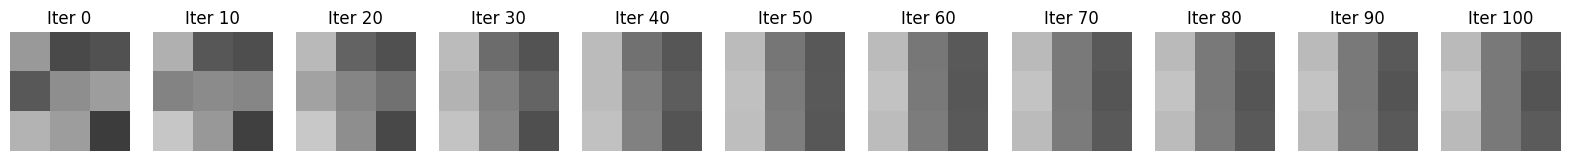

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Initialize a filter closer to the target
random_filter = np.array([[0.2, -0.42, -0.36],
                        [-0.31, 0.11, 0.23],
                        [0.41, 0.23, -0.52]])

# Define the vertical edge filter (target)
vertical_edge_filter = np.array([[-1, 0, 1],
                                 [-1, 0, 1],
                                 [-1, 0, 1]])

# Define a sample image (simple gradient image)
image = np.array([[1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0]], dtype=float)

# Parameters for gradient descent
learning_rate = 0.001 # Smaller learning rate for smoother evolution
num_iterations = 100

def apply_filter(image, filter):
    return convolve(image, filter, mode='constant', cval=0.0)

# Gradient descent to update the random filter
filter_updates = [random_filter.copy()]
for i in range(num_iterations):
    output_random = apply_filter(image, random_filter)
    output_target = apply_filter(image, vertical_edge_filter)
    
    # Compute the error
    error = output_random - output_target
    
    # Compute the gradient for each element in the filter
    grad = np.zeros_like(random_filter)
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    for j in range(random_filter.shape[0]):
        for k in range(random_filter.shape[1]):
            region = padded_image[j:j + error.shape[0], k:k + error.shape[1]]
            grad[j, k] = np.sum(error * region)
    
    # Update the filter
    random_filter -= learning_rate * grad
    random_filter /= np.linalg.norm(random_filter) # Normalize the filter
    if (i + 1) % 10 == 0:
        filter_updates.append(random_filter.copy())

# Visualization of the filter evolution
fig, axes = plt.subplots(1, len(filter_updates), figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(filter_updates[i], cmap='gray', vmin=-1, vmax=1)
    ax.set_title(f"Iter {i*10}")
    ax.axis('off')
plt.show()

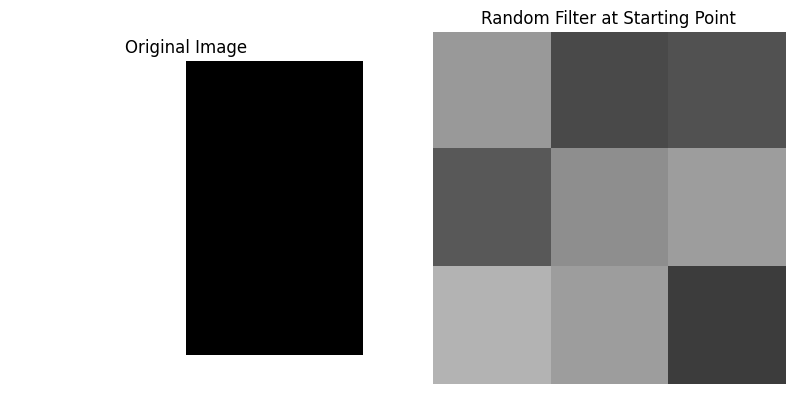

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sample image (simple gradient image)
image = np.array([[1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0]], dtype=float)

# Initialize a filter closer to the target
random_filter = np.array([[0.2, -0.42, -0.36],
                        [-0.31, 0.11, 0.23],
                        [0.41, 0.23, -0.52]])

# Visualization of the image and the random filter at the starting point
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(random_filter, cmap='gray', vmin=-1, vmax=1)
axes[1].set_title("Random Filter at Starting Point")
axes[1].axis('off')

plt.show()

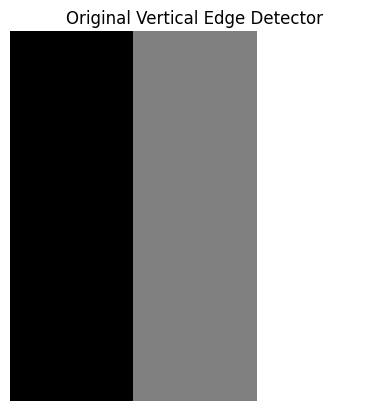

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vertical edge filter (target)
vertical_edge_filter = np.array([[-1, 0, 1],
                                 [-1, 0, 1],
                                 [-1, 0, 1]])

# Visualization of the vertical edge filter
plt.imshow(vertical_edge_filter, cmap='gray', vmin=-1, vmax=1)
plt.title("Original Vertical Edge Detector")
plt.axis('off')
plt.show()